Statistical Learning 1  
Ramiro Wong  
23000952

# Proyecto 1 - Fase 1 - Ingeniería de Características

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [90]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
dataset.drop(columns=['customerID'], inplace=True) #quitamos la columna de ID que no se utilizará en el análisis

Del análisis exploratorio, aprendimos que la única variable numérica a la que le faltan datos es TotalCharges. Los datos faltantes se codificaron en el dataset original con un espacio " ", lo que hace que la columna sea leída como categórica. Comenzaremos por cambiar los valores registrados con espacio por un NaN.

In [92]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", pd.NA)
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"])


In [93]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [94]:
continuas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) > 30)]
continuas

['tenure', 'MonthlyCharges', 'TotalCharges']

In [95]:
discretas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) <= 30)]
discretas

['SeniorCitizen']

### 4a. Imputación de Variables con Data Faltante - Numéricas

Determinamos la proporcion de valores vacíos en TotalCharges

In [96]:
dataset["TotalCharges"].isnull().mean() 


0.001561834445548772

La cantidad de registros vacíos es muy baja, menor al 1% de faltantes.

In [97]:
dataset["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

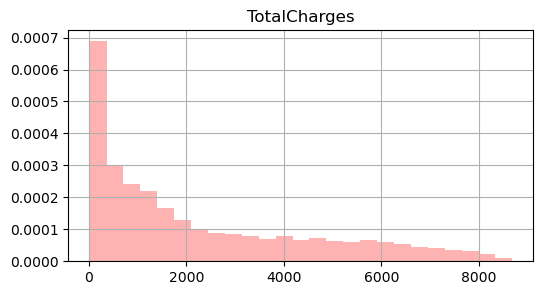

In [98]:
fig = plt.figure(figsize=(6, 3))
dataset['TotalCharges'].hist(bins=25, density=True, color='red', alpha=0.3)
plt.title('TotalCharges')
plt.show()

### Imputación de Media

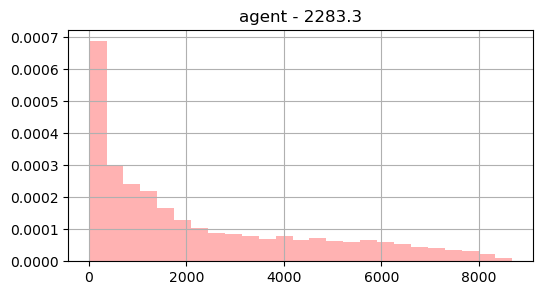

count    7043.000000
mean     2283.300440
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [99]:
mean_TotalCharges = round(dataset['TotalCharges'].mean(), 2)

mean_series = dataset['TotalCharges'].fillna(mean_TotalCharges)

fig = plt.figure(figsize=(6, 3))
mean_series.hist(bins=25, density=True, color='red', alpha=0.3)
plt.title('agent - ' + str(mean_TotalCharges))
plt.show()

mean_series.describe()

### Imputación de Mediana

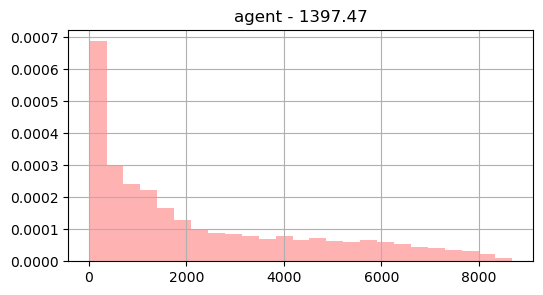

count    7043.000000
mean     2281.916920
std      2265.270402
min        18.800000
25%       402.225000
50%      1397.470000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [100]:
median_TotalCharges = round(dataset['TotalCharges'].median(), 2)

median_series = dataset['TotalCharges'].fillna(median_TotalCharges)

fig = plt.figure(figsize=(6, 3))
median_series.hist(bins=25, density=True, color='red', alpha=0.3)
plt.title('agent - ' + str(median_TotalCharges))
plt.show()

median_series.describe()

### Impacto de las imputaciones

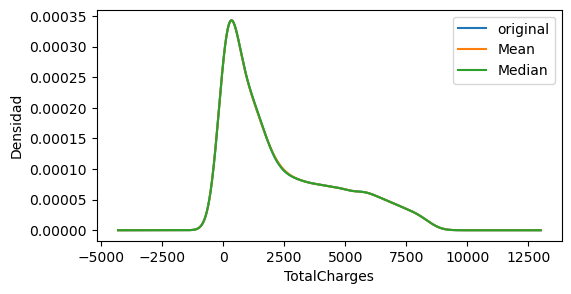

In [101]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

dataset["TotalCharges"].plot(kind="kde", ax=ax, label="original")
mean_series.plot(kind="kde", ax=ax, label="Mean")
median_series.plot(kind="kde", ax=ax, label="Median")

ax.legend()
plt.ylabel("Densidad")
plt.xlabel("TotalCharges")
plt.show()

En este caso, tanto la imputacion por Media y Mediana son métodos aceptables, pues no tienen un impacto significativo sobre la distribución original de la variable. Seleccionamos la imputacón por Media para los faltantes.

Imputación:

In [102]:
dataset['TotalCharges'].fillna(median_TotalCharges, inplace=True)

### 4a. Imputación de Variables con Data Faltante - Categóricas

En el análisis exploratorio se encontró que ninguna variable categórica tiene datos faltantes. 

# 4b. Codificación de Variables Categóricas

In [103]:
# Determinamos la cantidad de categorías en cada variable
dataset[categoricas].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

Dada la baja cantidad de categorías diferentes en cada una de nuestras variables, todas menores a 4, usaremos Label Encoding. Esto además, porque las diferentes variables indican:
* Presencia o ausencia de una característica
* Tipo de algún servicio  

Hay varias categorías que tienen una frecuencia similar entre si (por ejemplo: género), por lo que usar Frequency Encoding no nos daría una separación clara entre ellas.

Para la mayoría de variables, usaremos el label encoding para asignar un valor nominal que haga sentido para las variables, por ejemplo, 0 para ausencia del servicio y 1 para presencia. 

### Codificación parte 1: categóricas binarias
Para las categóricas con dos opciones, en su mayoría (Yes/No), utilizamos 0 para el No y 1 para Yes. Para gender, se asignará de forma arbitraria.


In [104]:
#determinamos las variables categoricas binarias
categoricas_binarias = []

for col in categoricas:
    if(dataset[col].nunique() == 2):
        categoricas_binarias.append(col)

categoricas_binarias

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [105]:
for col in categoricas_binarias:
    dataset[col].replace({'No': 0, 'Yes': 1}, inplace=True)

dataset["gender"].replace({'Male': 0, 'Female': 1}, inplace=True)

### Codificación parte 2

El siguiente grupo es aquel que tiene una estructura similar a la columna "MultipleLines". Son variables que describen algún detalle adicional del servicio, los valores son del tipo:  
* No tiene el servicio - se categorizará con un 0
* No tiene el adicional pero si el servicio - se categorirzará con un 1
* Tiene el servicio con un adicional - se categorizará con un 2

In [106]:
categoricas_p2 = ["MultipleLines", 
                "OnlineSecurity", 
                "OnlineBackup", 
                "DeviceProtection", 
                "TechSupport", 
                "StreamingTV", 
                "StreamingMovies"]

for col in categoricas_p2:
    #reemplazamos NO con 1 y YES con 2
    dataset[col].replace({'No': 1, 'Yes': 2}, inplace=True)

    #reemplazamos cualquier otro valor con 0
    dataset[categoricas_p2] = dataset[categoricas_p2].applymap(lambda x: x if x in [1, 2] else 0)

### Codificación parte 3

Variables con más de una opción y estructura que varía entre ellas. Asignaremos una categorización nominal para las que así lo requieran. 

In [107]:
# Variable InternetService
dataset["InternetService"].replace({'No': 0,
                                    'DSL': 1,
                                    'Fiber optic': 2}, inplace=True)

# Variable Contract
dataset["Contract"].replace({'Month-to-month': 0,
                            'One year': 1,
                            'Two year': 2}, inplace=True)

# Variable PaymentMethod
dataset["PaymentMethod"].replace({'Bank transfer (automatic)': 0,
                            'Credit card (automatic)': 1,
                            'Electronic check': 2,
                            'Mailed check': 3}, inplace=True)

Comprobación

In [108]:
dataset.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# 4d. Tratamiento de Outliers

tenure


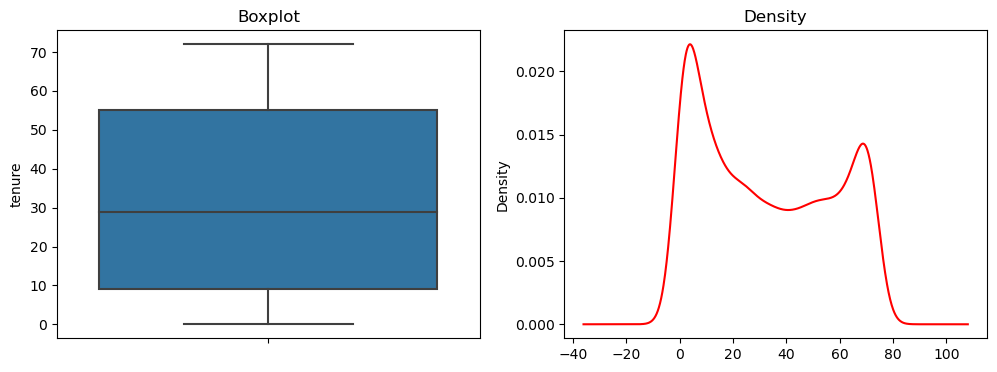

MonthlyCharges


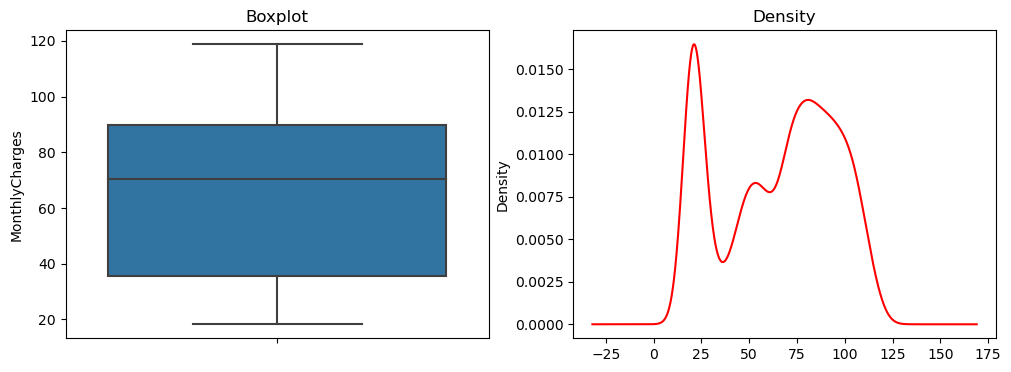

TotalCharges


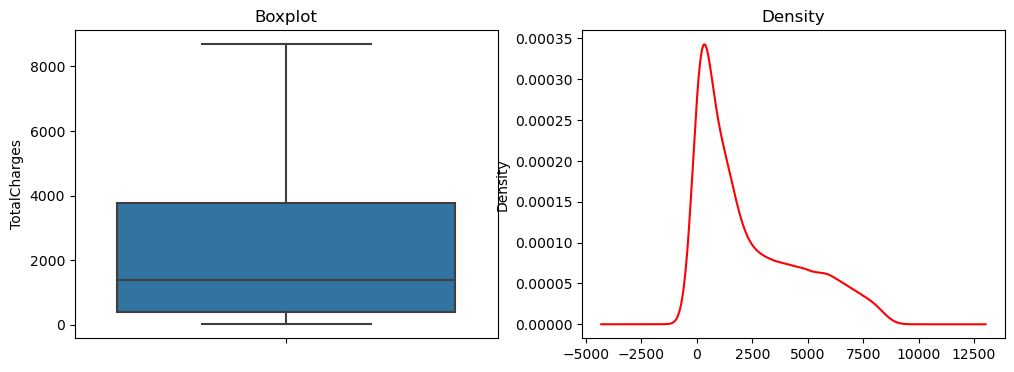

In [109]:
for col in continuas:
    print(col)

    plt.figure(figsize=(12,4))

    plt.subplot(121)
    plt.title("Boxplot")
    sns.boxplot(y=dataset[col])

    plt.subplot(122)
    plt.title("Density")
    dataset[col].plot.density(color="red")

    plt.show()

tenure


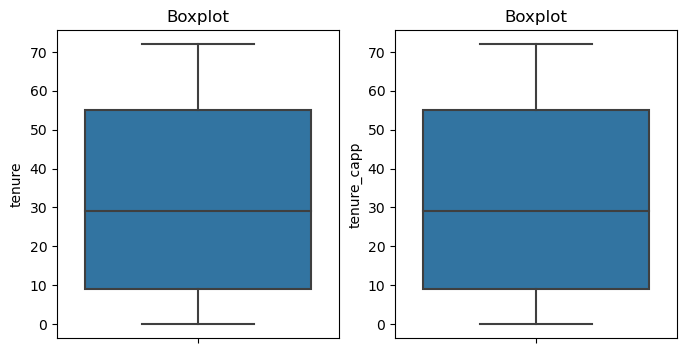

MonthlyCharges


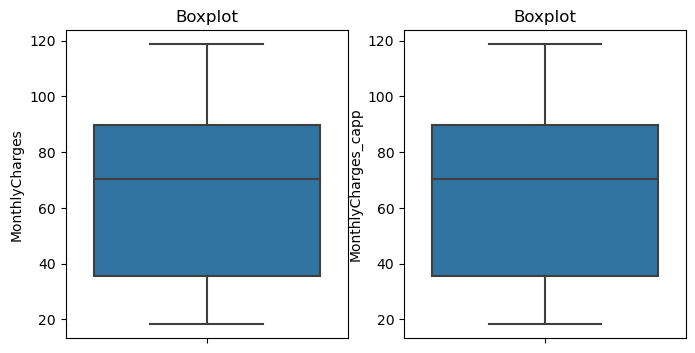

TotalCharges


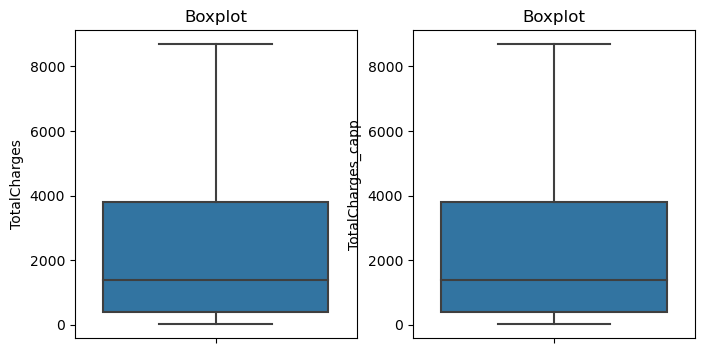

In [110]:
for col in continuas:
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - 1.5*IQR
    LS = dataset[col].quantile(0.75) + 1.5*IQR
    
    dataset[col+"_capp"] = np.where(dataset[col] >LS, LS, np.where(dataset[col]<LI, LI, dataset[col]))

    print(col)

    plt.figure(figsize=(8,4))

    plt.subplot(121)
    plt.title("Boxplot")
    sns.boxplot(y=dataset[col])

    plt.subplot(122)
    plt.title("Boxplot")
    sns.boxplot(y=dataset[col+"_capp"])

    plt.show()

In [118]:
for col in continuas:
    dataset[col] = dataset[col+"_capp"]

En este caso, podemos observar en el análisis con los boxplots que el tratamiento de outliers no tiene un efecto tan significativo dentro de las variables continuas. Esto debido a que los datos de por si están muy desviados dentro del rango de las variables.

# 4c. Transformación de Variables Numéricas

De las variables numéricas, sólo la variable "tenure" tiene problemas con el dominio, al tener valores iguales a 0, como lo vimos en el análisis exploratorio.

In [119]:
def plot_sensity_qq(df, variable):

    plt.figure(figsize=(8,4))

    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

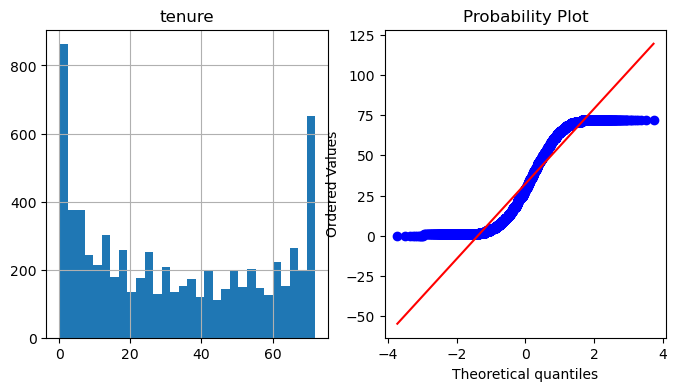

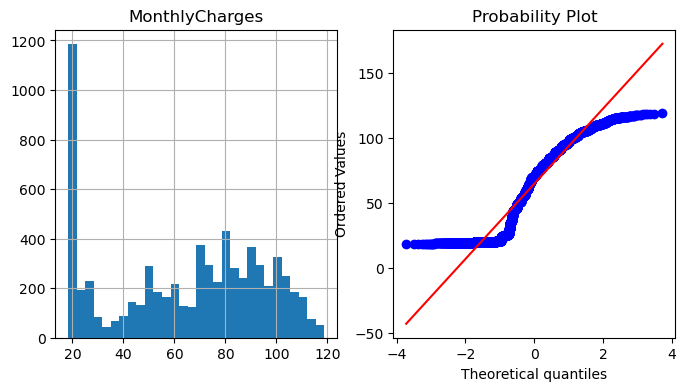

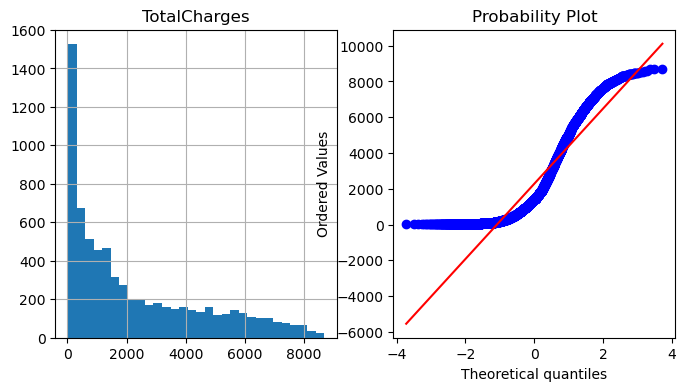

In [120]:
for col in continuas:
    plot_sensity_qq(dataset, col)

### Transformacion logaritmica

Con esta transformación no se logra normalizar ninguna de las dos variables que podrían aplicar por dominio.

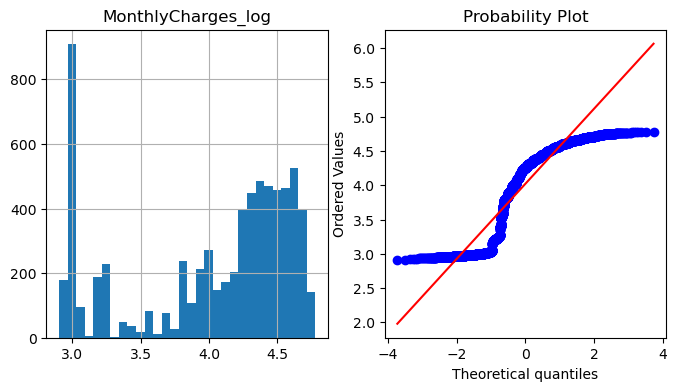

In [121]:
dataset["MonthlyCharges_log"] = np.log(dataset["MonthlyCharges"])
plot_sensity_qq(dataset, "MonthlyCharges_log")

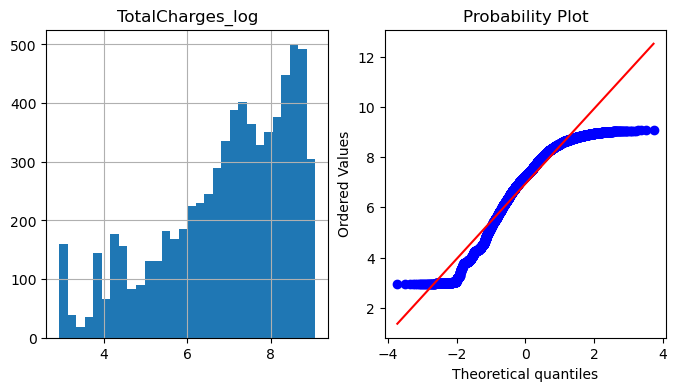

In [122]:
dataset["TotalCharges_log"] = np.log(dataset["TotalCharges"])
plot_sensity_qq(dataset, "TotalCharges_log")

### Transformación Inversa

La transformación inversa tampoco ayuda a normalizar las variables que aplican

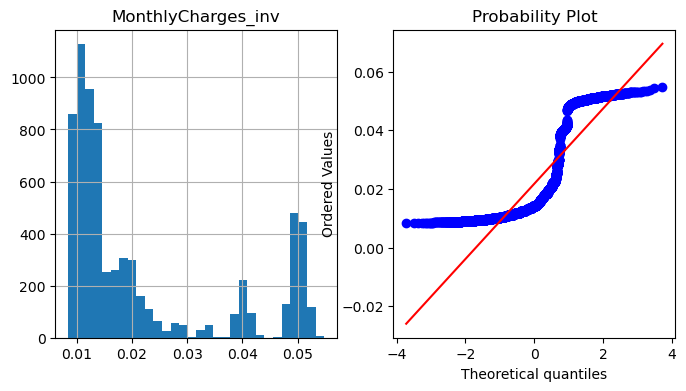

In [123]:
dataset["MonthlyCharges_inv"] = 1/dataset["MonthlyCharges"]
plot_sensity_qq(dataset, "MonthlyCharges_inv")

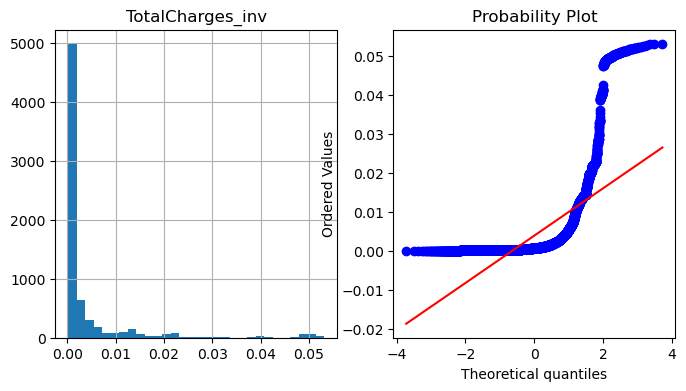

In [124]:
dataset["TotalCharges_inv"] = 1/dataset["TotalCharges"]
plot_sensity_qq(dataset, "TotalCharges_inv")

### Transformación Cuadrática

La transformación cuadrática tampoco logra normalizar lo datos.

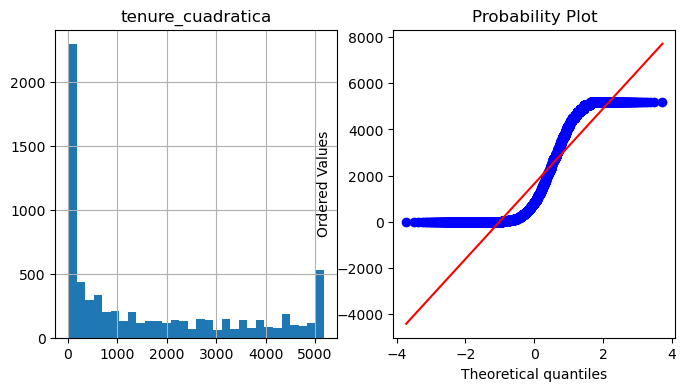

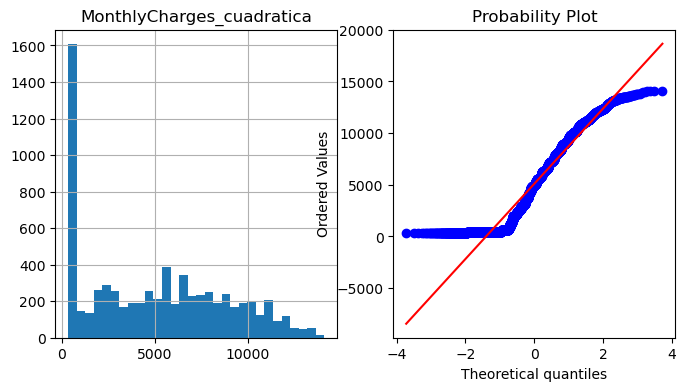

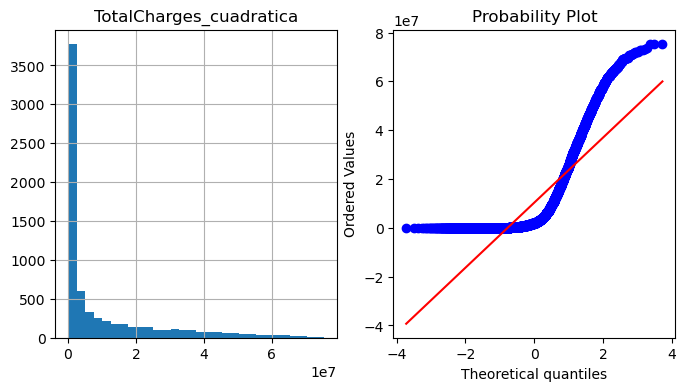

In [125]:
for col in continuas: 
    dataset[col+"_cuadratica"] = dataset[col]**2
    plot_sensity_qq(dataset, col+"_cuadratica")

### Transformación Box-Cox

La transformación Box-Cox no termina por normalizar las variables a las que se puede aplicar, pero si resulta en una mejor distribución que las transformaciones anteriores

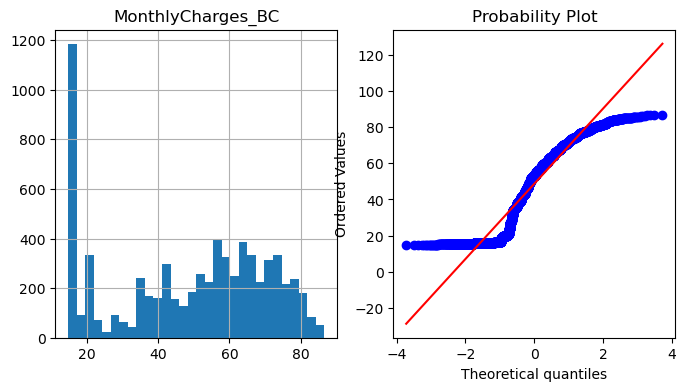

In [129]:
dataset["MonthlyCharges_BC"], lmbd = stats.boxcox(dataset["MonthlyCharges"])
plot_sensity_qq(dataset, "MonthlyCharges_BC")

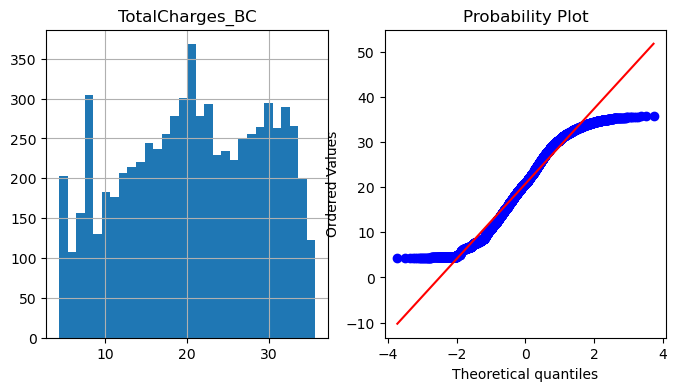

In [130]:
dataset["TotalCharges_BC"], lmbd = stats.boxcox(dataset["TotalCharges"])
plot_sensity_qq(dataset, "TotalCharges_BC")

### Transformación Yeo-Johnson

La transformación Yeo-Johnson, aunque no nos deja una distribución normal, si es la que más se normaliza las tres variables continuas de nuestro dataset, por lo que es al distribución que se aplicará.

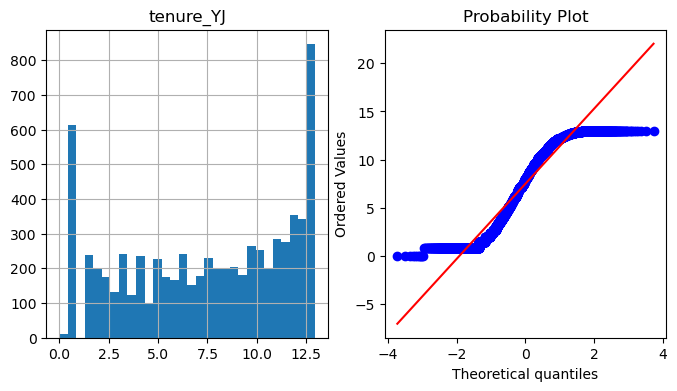

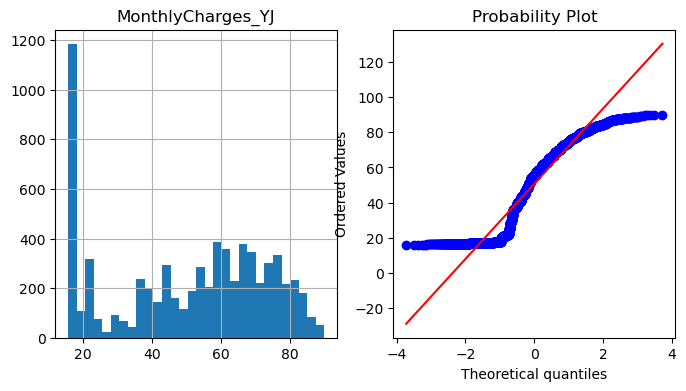

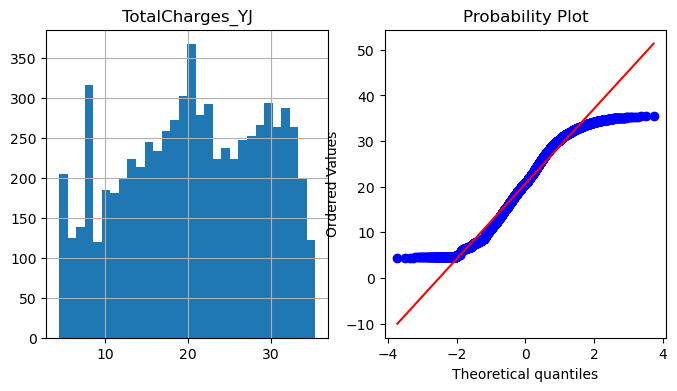

In [131]:
for col in continuas: 
    dataset[col+"_YJ"], lmbd = stats.yeojohnson(dataset[col])
    plot_sensity_qq(dataset, col+"_YJ")

Aplicación de la transformación:

In [132]:
for col in continuas:
    dataset[col] = dataset[col+"_YJ"]

Eliminamos las columnas temporales:

In [135]:
temporales = ['tenure_capp', 'MonthlyCharges_capp', 'TotalCharges_capp', 'MonthlyCharges_log',
       'TotalCharges_log', 'MonthlyCharges_inv', 'TotalCharges_inv', 'tenure_cuadratica', 
       'MonthlyCharges_cuadratica','TotalCharges_cuadratica', 'MonthlyCharges_BC', 'TotalCharges_BC',
       'tenure_YJ', 'MonthlyCharges_YJ', 'TotalCharges_YJ']

dataset.drop(columns=temporales, inplace=True)

dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.812271,0,0,1,0,0,0,0,0,0,0,1,2,24.808856,5.466529,0
1,0,0,0,0,8.707660,1,1,1,0,0,0,0,0,0,1,0,3,45.352363,22.785731,0
2,0,0,0,0,1.417776,1,1,1,0,0,0,0,0,0,0,1,3,43.046130,9.022086,1
3,0,0,0,0,10.127377,0,0,1,0,0,0,0,0,0,1,0,0,34.363919,22.609166,0
4,1,0,0,0,1.417776,1,1,2,0,0,0,0,0,0,0,1,2,55.479087,10.173582,1


# 4e. Estandarización de Variables

Nuestras variables continuas se encuentran en el dominio de los valores positivos. Por lo tanto, elegimos utilizar el MinMax Scaling que nos dará valores entre 0 y 1.

Análsis previo:  
Las tres variables tienen un rango que no es comparable entre sí (después de la transformación). Podemos ver cómo los MonthlyCharges llegan hasta arriba de 120, mientras que los totales superan los 40 y el tenure (tiempo como clientes) se mantiene entre 0 y 20. Dada esta diferencia, es necesario estandarizar valores en las tres variables.

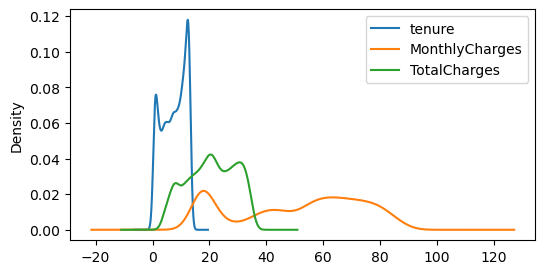

In [138]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

dataset["tenure"].plot(kind="kde", ax=ax, label="tenure")
dataset["MonthlyCharges"].plot(kind="kde", ax=ax, label="MonthlyCharges")
dataset["TotalCharges"].plot(kind="kde", ax=ax, label="TotalCharges")

plt.legend()
plt.show()

### MinMaxScaling

In [139]:
for col in continuas:
    min_LF = dataset[col].min()
    max_LF = dataset[col].max()
    range_LF = (max_LF - min_LF)

    dataset[col+"_mmScaled"] = (dataset[col]-min_LF)/(range_LF)

Después de hacer el Feature Scaling, podemos ver como las tres variables quedan en una escala adecuada y comparable entre sí. También su distribución se logra apreciar de forma más clara.

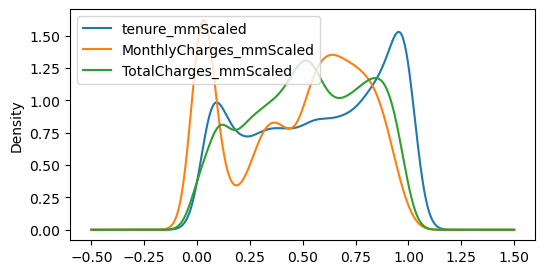

In [140]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

dataset["tenure_mmScaled"].plot(kind="kde", ax=ax, label="tenure_mmScaled")
dataset["MonthlyCharges_mmScaled"].plot(kind="kde", ax=ax, label="MonthlyCharges_mmScaled")
dataset["TotalCharges_mmScaled"].plot(kind="kde", ax=ax, label="TotalCharges_mmScaled")

plt.legend()
plt.show()

Ejecución de la Estandarización:

In [141]:
for col in continuas:
    dataset[col] = dataset[col+"_mmScaled"]
    dataset.drop(columns=col+"_mmScaled", inplace=True)

dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.062689,0,0,1,0,0,0,0,0,0,0,1,2,0.123442,0.032351,0
1,0,0,0,0,0.672034,1,1,1,0,0,0,0,0,0,1,0,3,0.400120,0.592027,0
2,0,0,0,0,0.109420,1,1,1,0,0,0,0,0,0,0,1,3,0.369060,0.147250,1
3,0,0,0,0,0.781604,0,0,1,0,0,0,0,0,0,1,0,0,0.252128,0.586321,0
4,1,0,0,0,0.109420,1,1,2,0,0,0,0,0,0,0,1,2,0.536506,0.184461,1
